# Linear Regression

In [97]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [98]:
# Load data
df = pd.read_excel('data/Monthly Mastersheet.xlsx')

# Ensure date is datetime and set index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

## CPI
updated June 11
highest R^2- ethereum 0.26

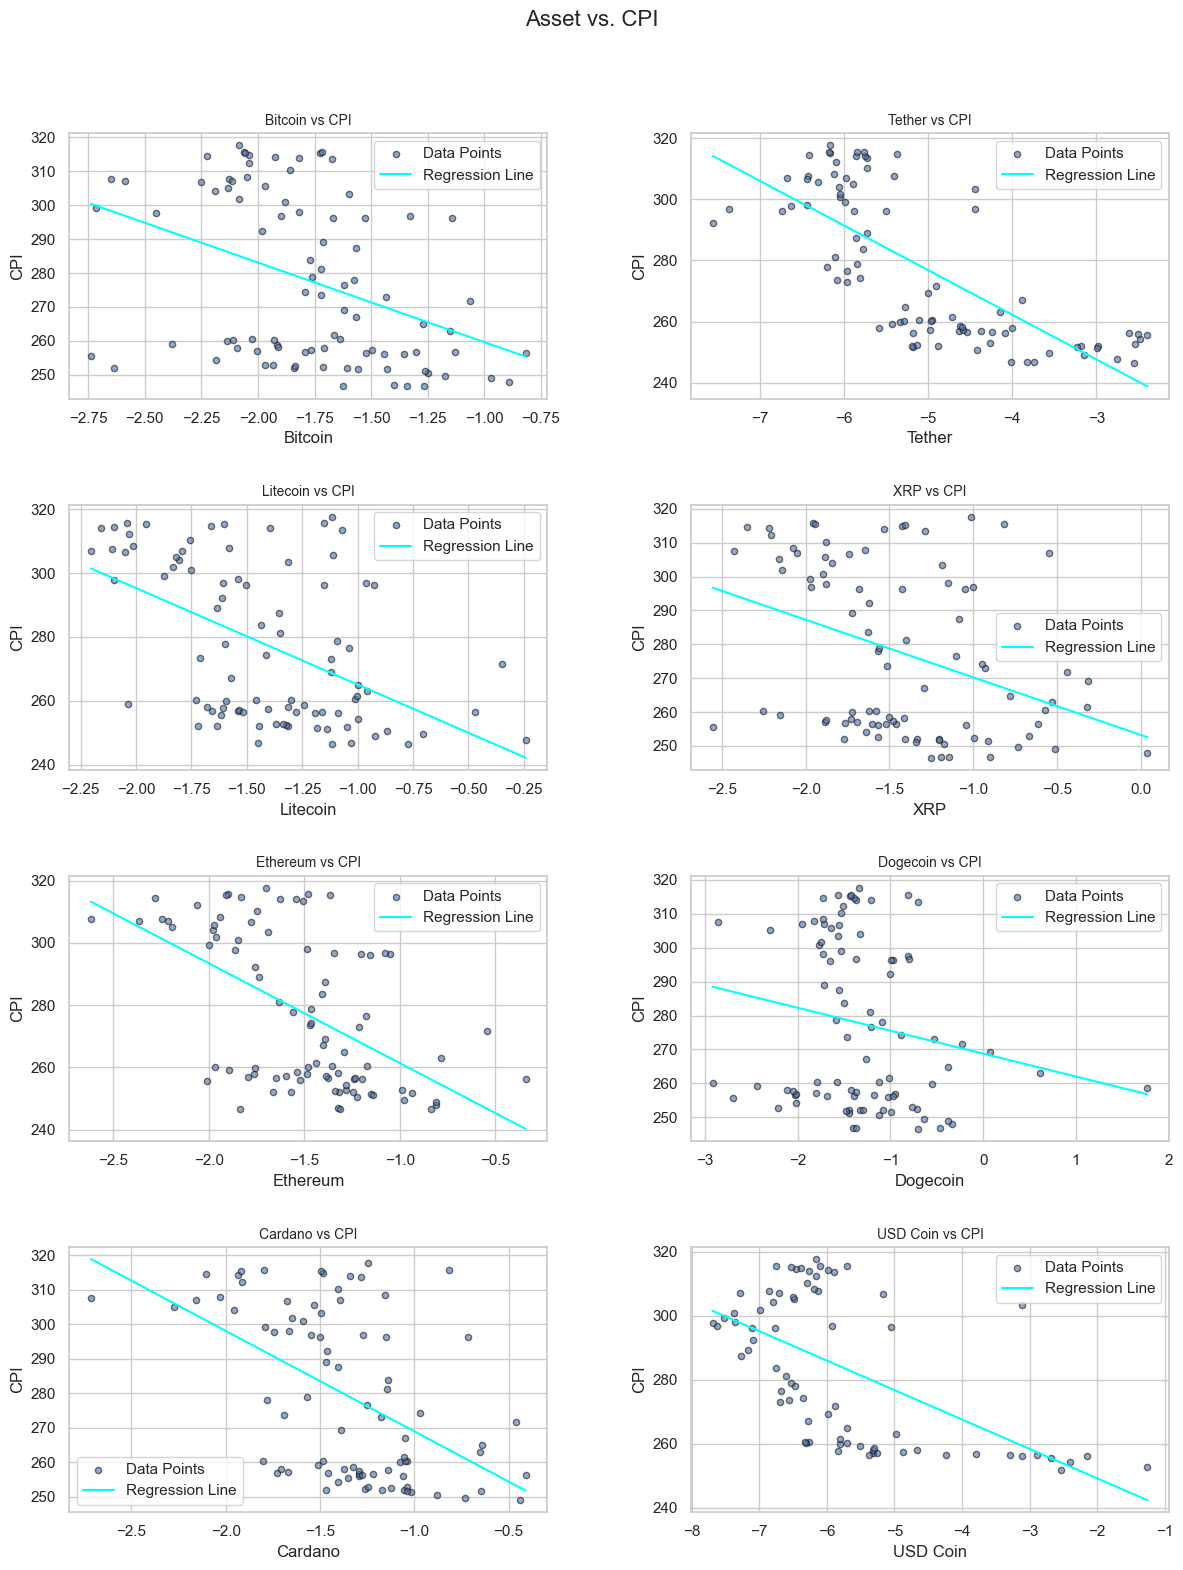

===== Bitcoin Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     15.71
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           0.000152
Time:                        13:45:30   Log-Likelihood:                -397.93
No. Observations:                  88   AIC:                             799.9
Df Residuals:                      86   BIC:                             804.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const  

In [99]:
import seaborn as sns
import numpy as np

asset_cols = ['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano ', 'USD Coin']
macro_cols = ['CPI']

sns.set(style="whitegrid")

total_plots = len(asset_cols) * len(macro_cols)
plots_per_row = 2
n_rows = (total_plots + plots_per_row - 1) // plots_per_row  # ceiling division

fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(6 * plots_per_row, 4 * n_rows))
fig.suptitle("Asset vs. CPI", fontsize=16)

axes = axes.flatten() if total_plots > 1 else [axes]
model_results = []

plot_idx = 0
for asset in asset_cols:
    for macro in macro_cols:
        if plot_idx >= total_plots:
            break
        ax = axes[plot_idx]
        
        # Drop rows with NaNs in either variable
        temp_df = df[[asset, macro]].dropna()
        x = temp_df[asset]
        y = temp_df[macro]

        # Scatter plot
        ax.scatter(x, y, alpha=0.6, edgecolor='k', s=20, label='Data Points')
        

        df['Lagged_LogVol'] = df[asset].shift(1)

        # Drop first row due to NaN from lag
        temp_df = df.dropna(subset=['Lagged_LogVol', macro])

        # Define X and y
        X = temp_df['Lagged_LogVol']
        y = temp_df[macro]

        X = sm.add_constant(X)  # Adds intercept

        # Fit OLS model
        model = sm.OLS(y, X).fit()
        model_results.append((asset.strip(), model))

        # Predict y values for a line
        x_vals = np.linspace(x.min(), x.max(), 100)
        X_pred = sm.add_constant(x_vals)
        y_pred = model.predict(X_pred)

        # Plot regression line
        ax.plot(x_vals, y_pred, color='cyan', label='Regression Line')

        ax.set_xlabel(asset.strip())
        ax.set_ylabel(macro)
        ax.set_title(f"{asset.strip()} vs {macro}", fontsize=10)
        ax.legend()

        plot_idx += 1
        

# Hide unused subplots
for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

for asset_name, model in model_results:
    print(f"===== {asset_name} Regression Summary =====")
    print(model.summary())
    print("\n")


## Imports (IM)
#### Tether (0.4), USD coin (0.28)

['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano ', 'USD Coin', 'VIX', 'MOVE', 'LFPR', 'CPI', 'r', 'M1', 'GDP', 'IM', 'EX', 'CC', 'CC Monthly % Change', 'Lagged_LogVol']
===== Bitcoin Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                     IM   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     7.752
Date:                Wed, 11 Jun 2025   Prob (F-statistic):            0.00660
Time:                        13:45:30   Log-Likelihood:                -666.17
No. Observations:                  88   AIC:                             1336.
Df Residuals:                      86   BIC:                             1341.
Df Model:                           1                                         
Covariance Type:            nonrobust                  

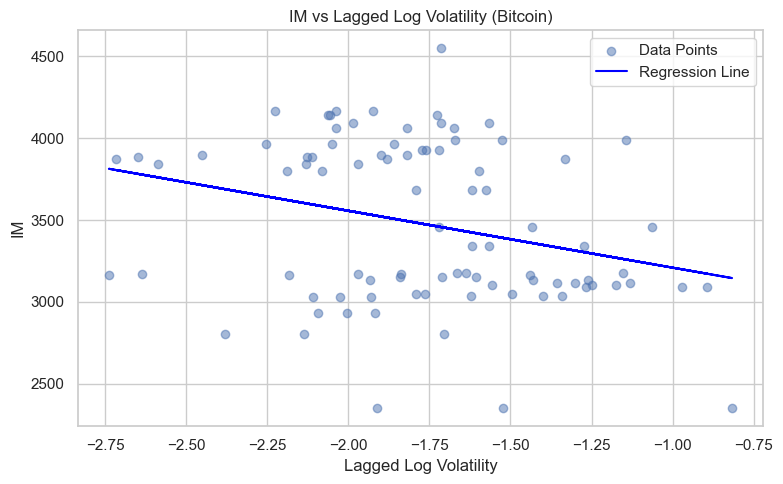

===== Tether Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                     IM   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     61.64
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           1.06e-11
Time:                        13:45:30   Log-Likelihood:                -646.19
No. Observations:                  88   AIC:                             1296.
Df Residuals:                      86   BIC:                             1301.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const   

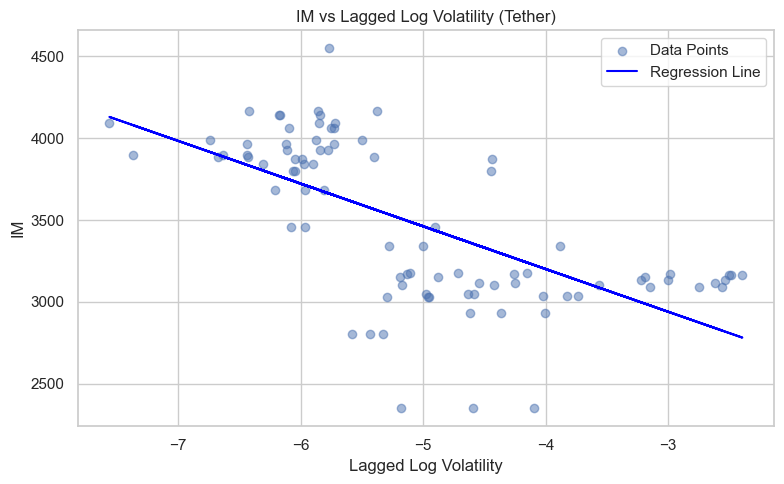

===== Litecoin Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                     IM   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     14.89
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           0.000219
Time:                        13:45:31   Log-Likelihood:                -662.94
No. Observations:                  88   AIC:                             1330.
Df Residuals:                      86   BIC:                             1335.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const 

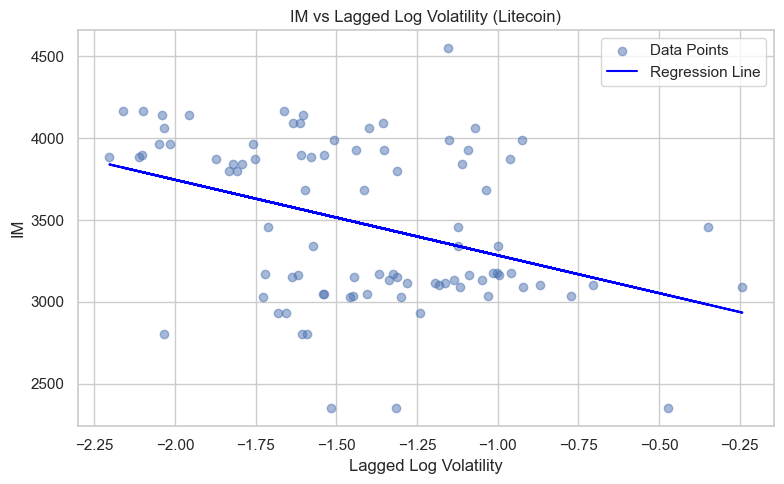

===== XRP Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                     IM   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     5.633
Date:                Wed, 11 Jun 2025   Prob (F-statistic):             0.0199
Time:                        13:45:31   Log-Likelihood:                -667.17
No. Observations:                  88   AIC:                             1338.
Df Residuals:                      86   BIC:                             1343.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const      

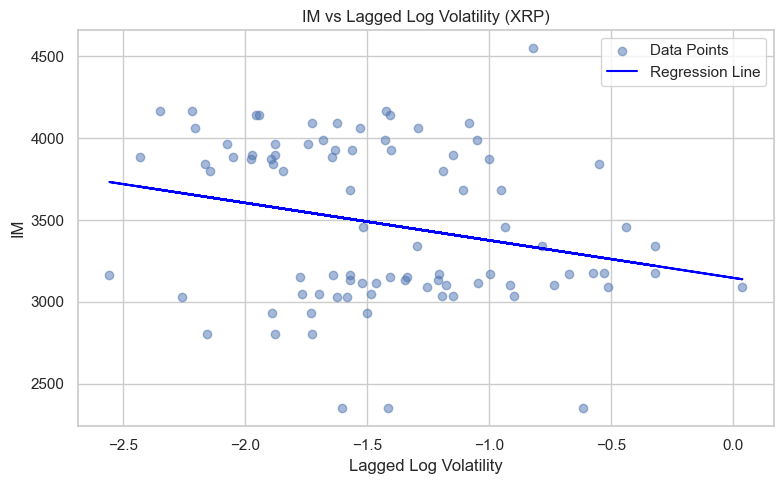

===== Ethereum Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                     IM   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     19.27
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           3.20e-05
Time:                        13:45:31   Log-Likelihood:                -661.07
No. Observations:                  88   AIC:                             1326.
Df Residuals:                      86   BIC:                             1331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const 

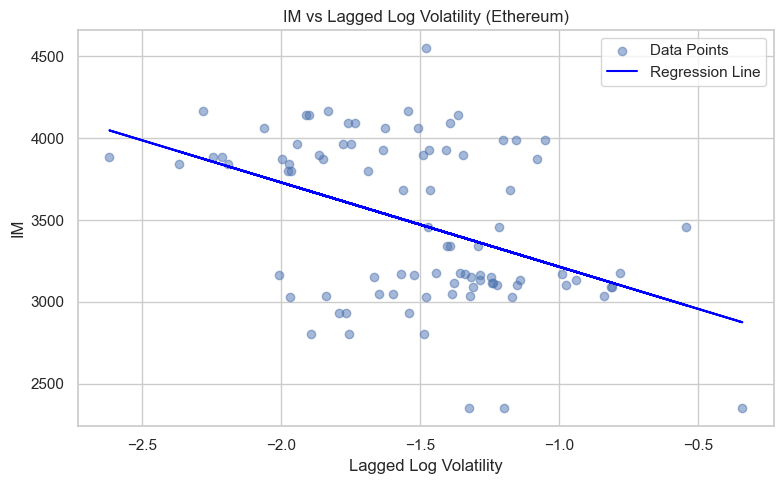

===== Dogecoin Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                     IM   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.075
Date:                Wed, 11 Jun 2025   Prob (F-statistic):              0.303
Time:                        13:45:31   Log-Likelihood:                -669.42
No. Observations:                  88   AIC:                             1343.
Df Residuals:                      86   BIC:                             1348.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const 

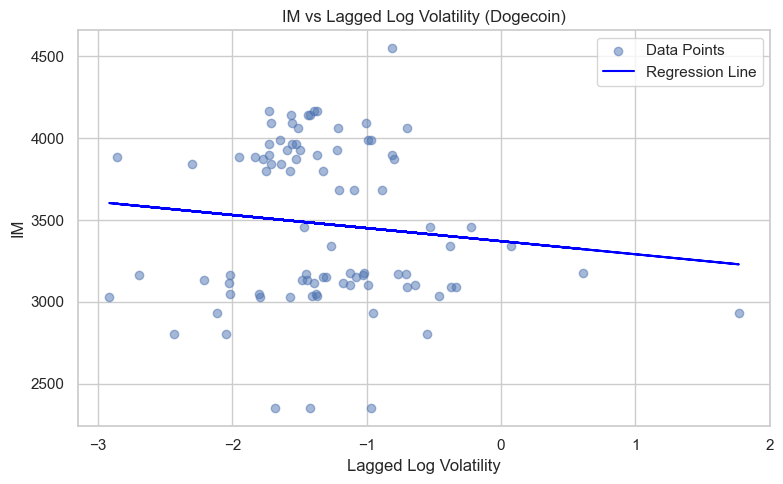

===== Cardano  Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                     IM   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     14.98
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           0.000218
Time:                        13:45:31   Log-Likelihood:                -625.41
No. Observations:                  83   AIC:                             1255.
Df Residuals:                      81   BIC:                             1260.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const 

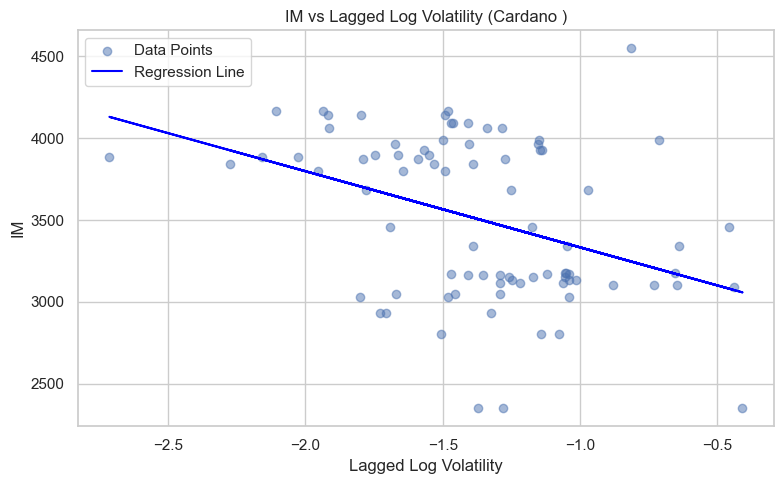

===== USD Coin Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                     IM   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     27.83
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           1.41e-06
Time:                        13:45:31   Log-Likelihood:                -538.59
No. Observations:                  72   AIC:                             1081.
Df Residuals:                      70   BIC:                             1086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const 

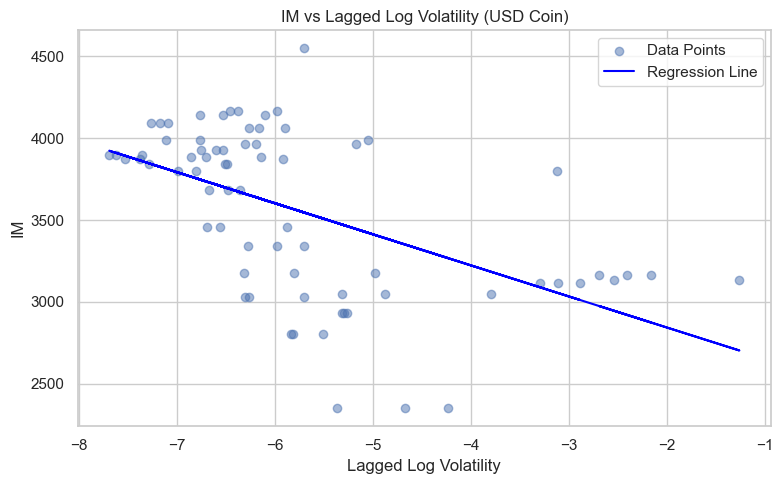

In [108]:
print(df.columns.tolist())

crypto_columns = ['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano ', 'USD Coin']

for coin in crypto_columns:
    # Create lagged log volatility
    df['Lagged_LogVol'] = df[coin].shift(1)

    # Drop first row due to NaN from lag
    temp_df = df.dropna(subset=['Lagged_LogVol', 'IM'])

    # Define X and y
    X = temp_df['Lagged_LogVol']
    y = temp_df['IM']

    X = sm.add_constant(X)  # Adds intercept

    # Fit OLS model
    model = sm.OLS(y, X).fit()

    # Print regression summary
    print(f"===== {coin} Regression Summary =====")
    print(model.summary())
    print("\n")

    # Plot: CPI vs Lagged_LogVol with regression line
    plt.figure(figsize=(8, 5))
    plt.scatter(temp_df['Lagged_LogVol'], y, alpha=0.5, label='Data Points')
    plt.plot(temp_df['Lagged_LogVol'], model.predict(X), color='blue', label='Regression Line')
    plt.title(f'IM vs Lagged Log Volatility ({coin})')
    plt.xlabel('Lagged Log Volatility')
    plt.ylabel('IM')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Exports (EX)

apparent outliers (Covid), Tether 0.30, Ethereum 0.20, cardano 0.19, USD coin 0.18

['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano ', 'USD Coin', 'VIX', 'MOVE', 'LFPR', 'CPI', 'r', 'M1', 'GDP', 'IM', 'EX', 'CC', 'CC Monthly % Change', 'Lagged_LogVol']
===== Bitcoin Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                     EX   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     8.590
Date:                Wed, 11 Jun 2025   Prob (F-statistic):            0.00433
Time:                        13:45:31   Log-Likelihood:                -638.65
No. Observations:                  88   AIC:                             1281.
Df Residuals:                      86   BIC:                             1286.
Df Model:                           1                                         
Covariance Type:            nonrobust                  

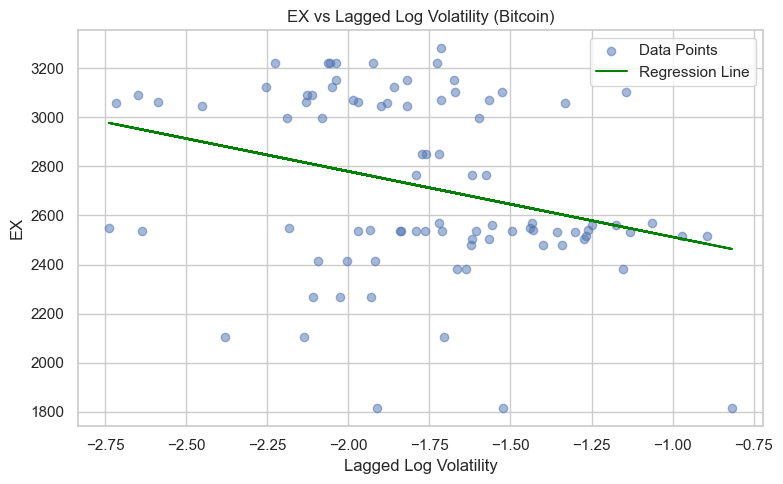

===== Tether Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                     EX   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     39.08
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           1.52e-08
Time:                        13:45:31   Log-Likelihood:                -626.35
No. Observations:                  88   AIC:                             1257.
Df Residuals:                      86   BIC:                             1262.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const   

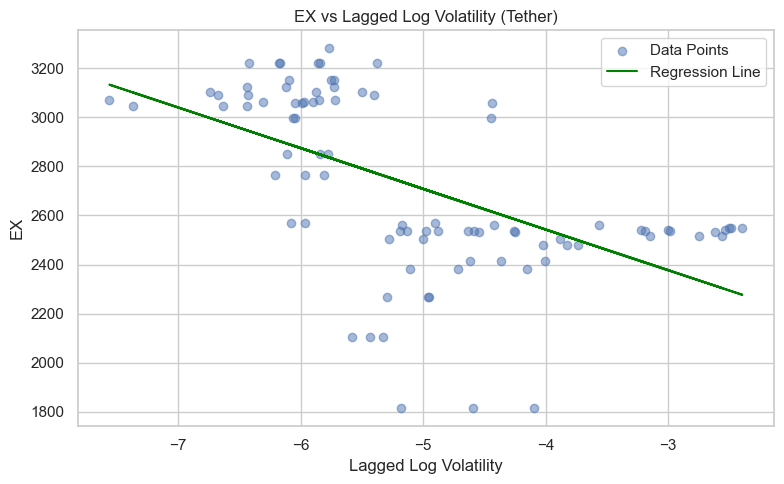

===== Litecoin Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                     EX   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     16.63
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           0.000101
Time:                        13:45:31   Log-Likelihood:                -635.06
No. Observations:                  88   AIC:                             1274.
Df Residuals:                      86   BIC:                             1279.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const 

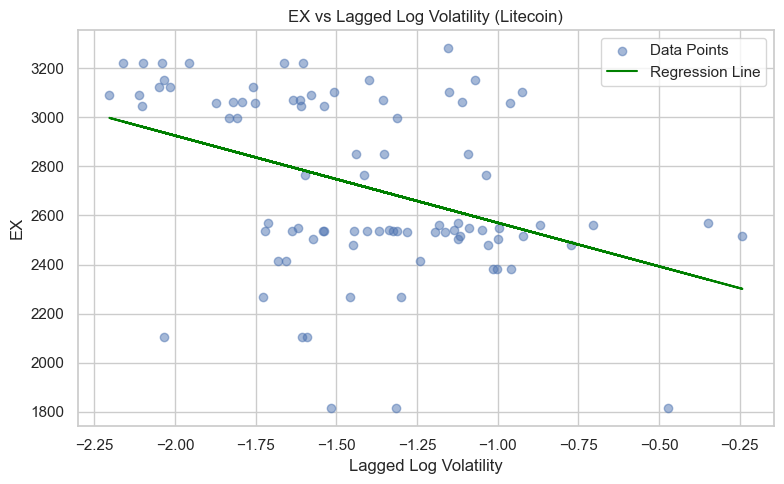

===== XRP Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                     EX   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     7.640
Date:                Wed, 11 Jun 2025   Prob (F-statistic):            0.00698
Time:                        13:45:31   Log-Likelihood:                -639.09
No. Observations:                  88   AIC:                             1282.
Df Residuals:                      86   BIC:                             1287.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const      

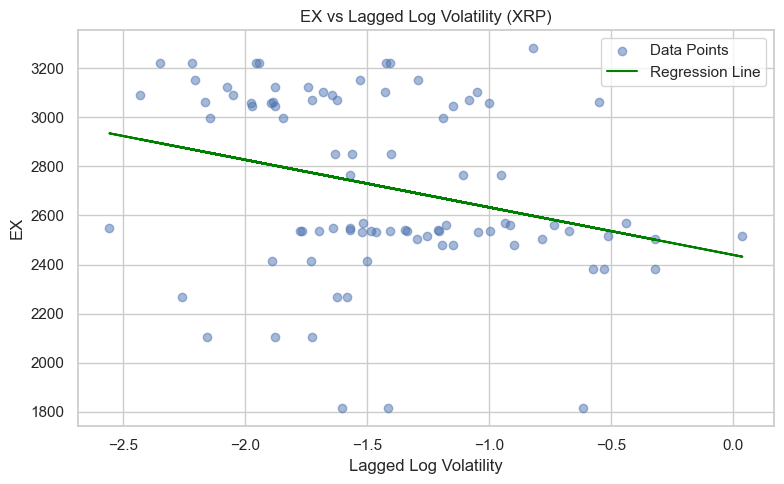

===== Ethereum Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                     EX   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     23.31
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           5.93e-06
Time:                        13:45:31   Log-Likelihood:                -632.28
No. Observations:                  88   AIC:                             1269.
Df Residuals:                      86   BIC:                             1274.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const 

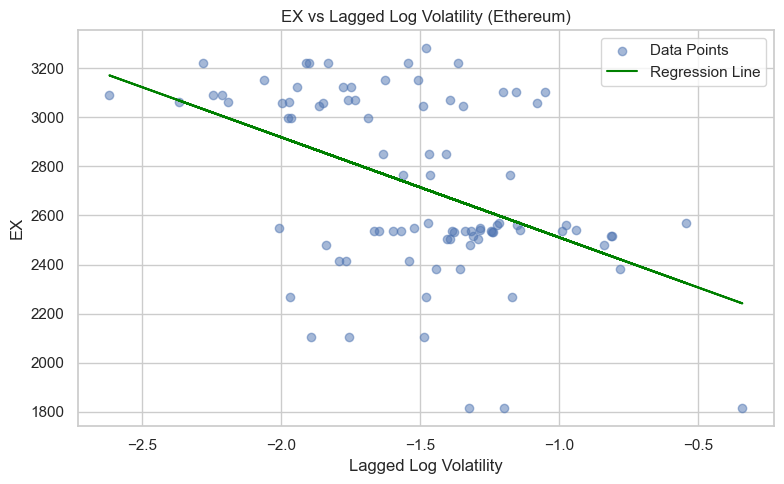

===== Dogecoin Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                     EX   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.627
Date:                Wed, 11 Jun 2025   Prob (F-statistic):              0.206
Time:                        13:45:31   Log-Likelihood:                -642.01
No. Observations:                  88   AIC:                             1288.
Df Residuals:                      86   BIC:                             1293.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const 

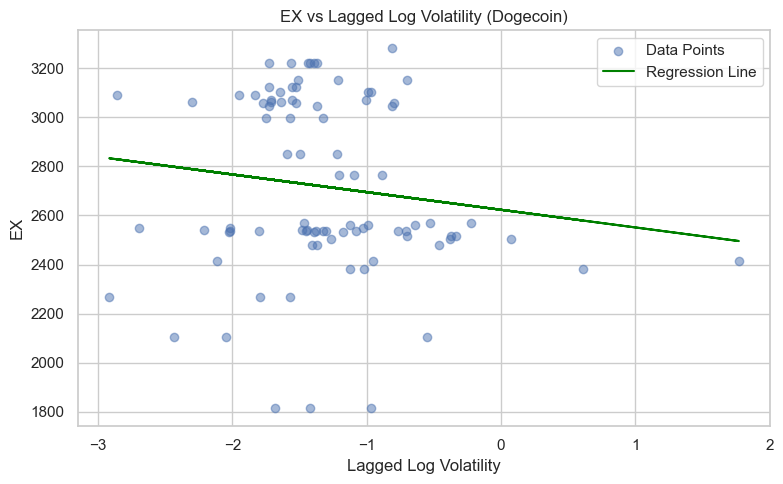

===== Cardano  Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                     EX   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     19.96
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           2.54e-05
Time:                        13:45:31   Log-Likelihood:                -598.62
No. Observations:                  83   AIC:                             1201.
Df Residuals:                      81   BIC:                             1206.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const 

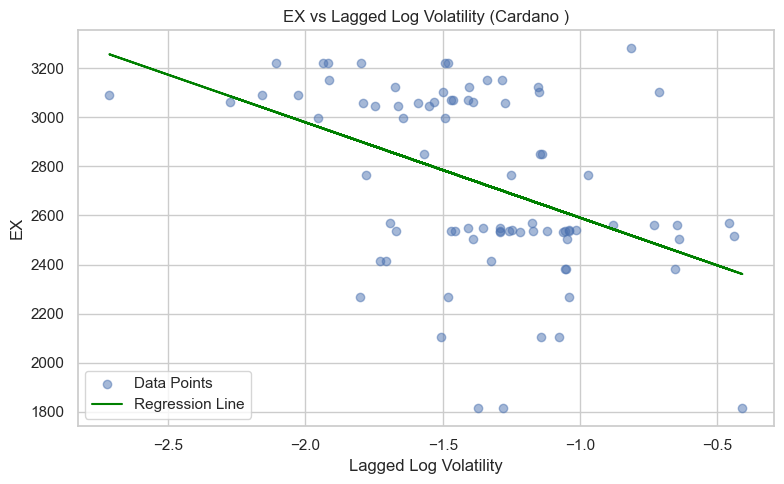

===== USD Coin Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                     EX   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     16.88
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           0.000107
Time:                        13:45:31   Log-Likelihood:                -523.06
No. Observations:                  72   AIC:                             1050.
Df Residuals:                      70   BIC:                             1055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const 

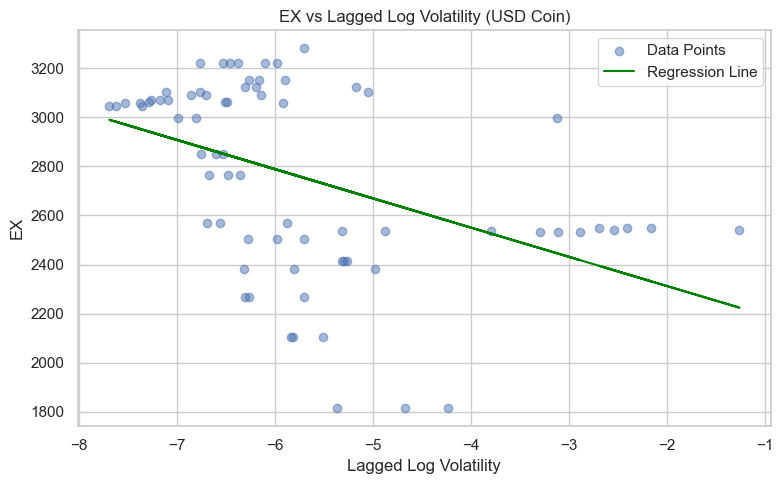

In [109]:
print(df.columns.tolist())

crypto_columns = ['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano ', 'USD Coin']

for coin in crypto_columns:
    # Create lagged log volatility
    df['Lagged_LogVol'] = df[coin].shift(1)

    # Drop first row due to NaN from lag
    temp_df = df.dropna(subset=['Lagged_LogVol', 'CPI'])

    # Define X and y
    X = temp_df['Lagged_LogVol']
    y = temp_df['EX']

    X = sm.add_constant(X)  # Adds intercept

    # Fit OLS model
    model = sm.OLS(y, X).fit()

    # Print regression summary
    print(f"===== {coin} Regression Summary =====")
    print(model.summary())
    print("\n")

    # Plot: CPI vs Lagged_LogVol with regression line
    plt.figure(figsize=(8, 5))
    plt.scatter(temp_df['Lagged_LogVol'], y, alpha=0.5, label='Data Points')
    plt.plot(temp_df['Lagged_LogVol'], model.predict(X), color='green', label='Regression Line')
    plt.title(f'EX vs Lagged Log Volatility ({coin})')
    plt.xlabel('Lagged Log Volatility')
    plt.ylabel('EX')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Consumer Confidence (CC)
#### Tether (0.618), USD Coin (0.502)

['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano ', 'USD Coin', 'VIX', 'MOVE', 'LFPR', 'CPI', 'r', 'M1', 'GDP', 'IM', 'EX', 'CC', 'CC Monthly % Change', 'Lagged_LogVol']
===== Bitcoin Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                     CC   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     5.803
Date:                Wed, 11 Jun 2025   Prob (F-statistic):             0.0181
Time:                        13:45:32   Log-Likelihood:                -359.08
No. Observations:                  88   AIC:                             722.2
Df Residuals:                      86   BIC:                             727.1
Df Model:                           1                                         
Covariance Type:            nonrobust                  

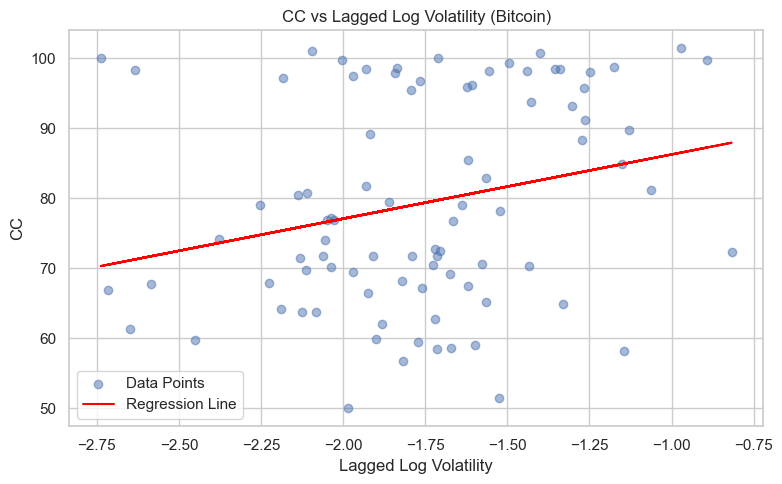

===== Tether Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                     CC   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     139.2
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           1.15e-19
Time:                        13:45:32   Log-Likelihood:                -319.60
No. Observations:                  88   AIC:                             643.2
Df Residuals:                      86   BIC:                             648.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const   

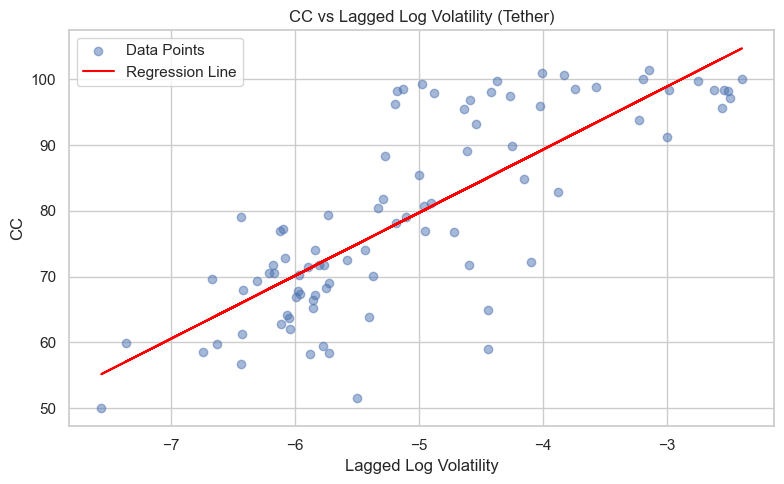

===== Litecoin Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                     CC   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     10.39
Date:                Wed, 11 Jun 2025   Prob (F-statistic):            0.00179
Time:                        13:45:32   Log-Likelihood:                -356.93
No. Observations:                  88   AIC:                             717.9
Df Residuals:                      86   BIC:                             722.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const 

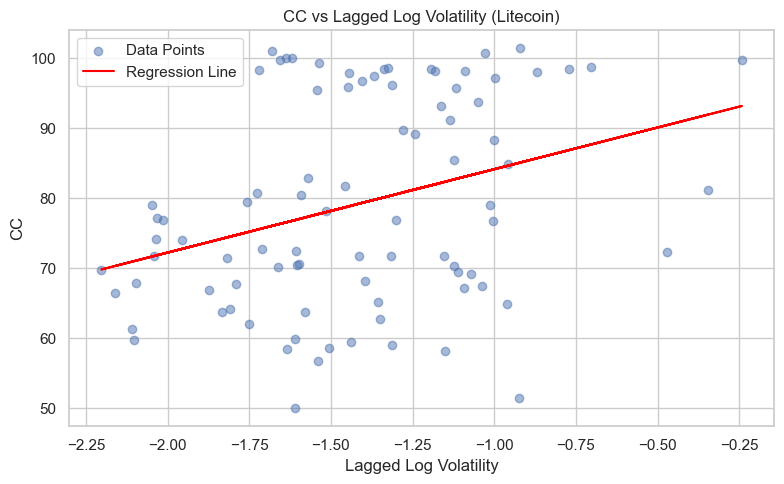

===== XRP Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                     CC   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     5.734
Date:                Wed, 11 Jun 2025   Prob (F-statistic):             0.0188
Time:                        13:45:32   Log-Likelihood:                -359.11
No. Observations:                  88   AIC:                             722.2
Df Residuals:                      86   BIC:                             727.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const      

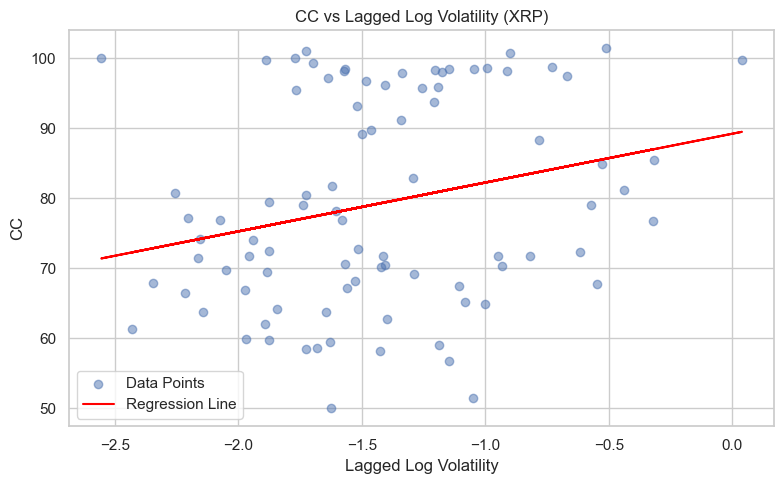

===== Ethereum Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                     CC   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     10.04
Date:                Wed, 11 Jun 2025   Prob (F-statistic):            0.00212
Time:                        13:45:32   Log-Likelihood:                -357.09
No. Observations:                  88   AIC:                             718.2
Df Residuals:                      86   BIC:                             723.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const 

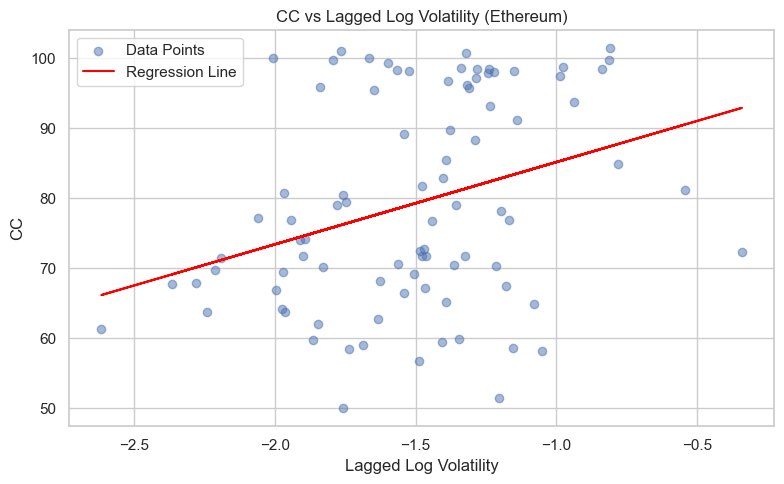

===== Dogecoin Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                     CC   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.289
Date:                Wed, 11 Jun 2025   Prob (F-statistic):              0.134
Time:                        13:45:32   Log-Likelihood:                -360.80
No. Observations:                  88   AIC:                             725.6
Df Residuals:                      86   BIC:                             730.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const 

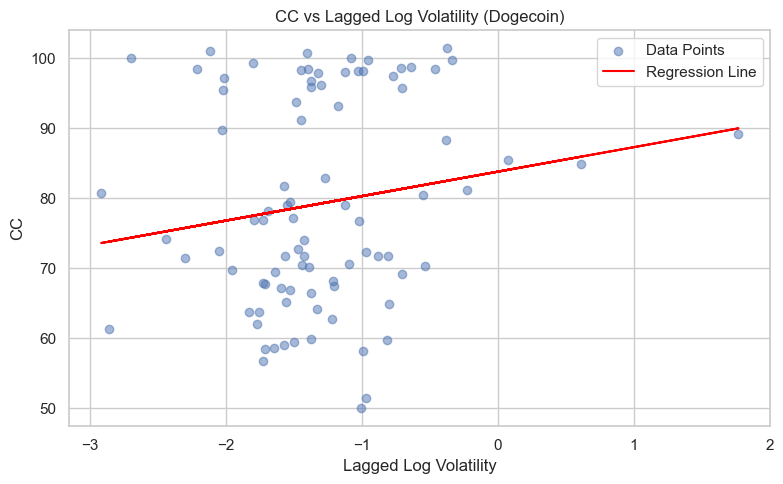

===== Cardano  Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                     CC   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     10.62
Date:                Wed, 11 Jun 2025   Prob (F-statistic):            0.00163
Time:                        13:45:32   Log-Likelihood:                -334.37
No. Observations:                  83   AIC:                             672.7
Df Residuals:                      81   BIC:                             677.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const 

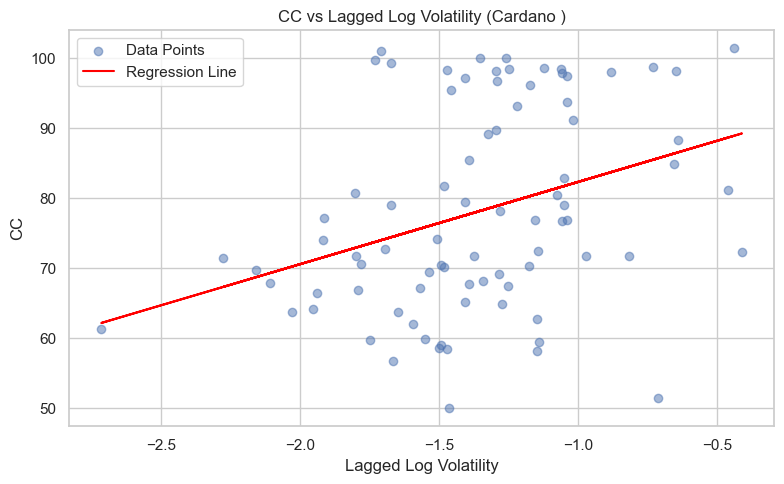

===== USD Coin Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                     CC   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     70.44
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           3.45e-12
Time:                        13:45:32   Log-Likelihood:                -262.26
No. Observations:                  72   AIC:                             528.5
Df Residuals:                      70   BIC:                             533.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const 

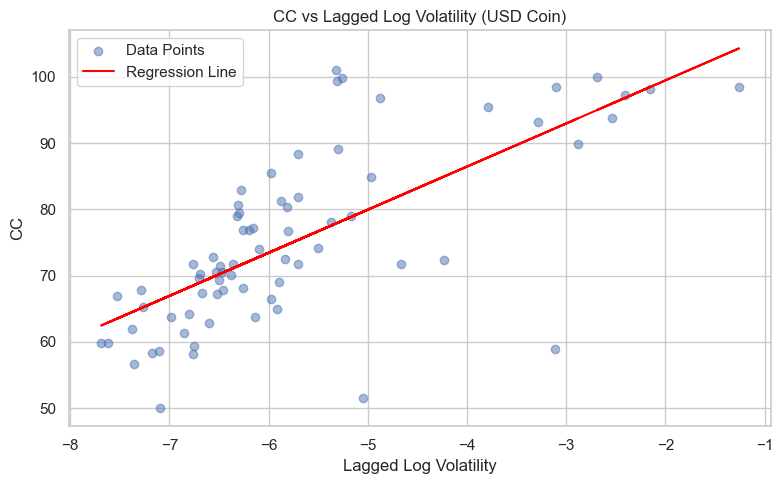

In [110]:
print(df.columns.tolist())

crypto_columns = ['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano ', 'USD Coin']

for coin in crypto_columns:
    # Create lagged log volatility
    df['Lagged_LogVol'] = df[coin].shift(1)

    # Drop first row due to NaN from lag
    temp_df = df.dropna(subset=['Lagged_LogVol', 'CC'])

    # Define X and y
    X = temp_df['Lagged_LogVol']
    y = temp_df['CC']

    X = sm.add_constant(X)  # Adds intercept

    # Fit OLS model
    model = sm.OLS(y, X).fit()

    # Print regression summary
    print(f"===== {coin} Regression Summary =====")
    print(model.summary())
    print("\n")

    # Plot: CPI vs Lagged_LogVol with regression line
    plt.figure(figsize=(8, 5))
    plt.scatter(temp_df['Lagged_LogVol'], y, alpha=0.5, label='Data Points')
    plt.plot(temp_df['Lagged_LogVol'], model.predict(X), color='red', label='Regression Line')
    plt.title(f'CC vs Lagged Log Volatility ({coin})')
    plt.xlabel('Lagged Log Volatility')
    plt.ylabel('CC')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## CC Monthly % Change

['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano ', 'USD Coin', 'VIX', 'MOVE', 'LFPR', 'CPI', 'r', 'M1', 'GDP', 'IM', 'EX', 'CC', 'CC Monthly % Change', 'Lagged_LogVol']
===== Bitcoin Regression Summary =====
                             OLS Regression Results                            
Dep. Variable:     CC Monthly % Change   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.012
Method:                  Least Squares   F-statistic:                  0.009068
Date:                 Wed, 11 Jun 2025   Prob (F-statistic):              0.924
Time:                         13:45:32   Log-Likelihood:                 120.15
No. Observations:                   88   AIC:                            -236.3
Df Residuals:                       86   BIC:                            -231.3
Df Model:                            1                                         
Covariance Type:             nonrobust        

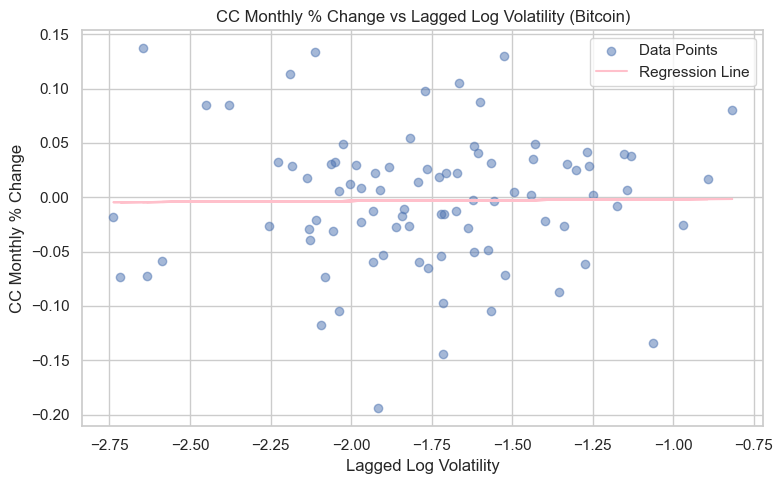

===== Tether Regression Summary =====
                             OLS Regression Results                            
Dep. Variable:     CC Monthly % Change   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                 -0.010
Method:                  Least Squares   F-statistic:                    0.1599
Date:                 Wed, 11 Jun 2025   Prob (F-statistic):              0.690
Time:                         13:45:32   Log-Likelihood:                 120.23
No. Observations:                   88   AIC:                            -236.5
Df Residuals:                       86   BIC:                            -231.5
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

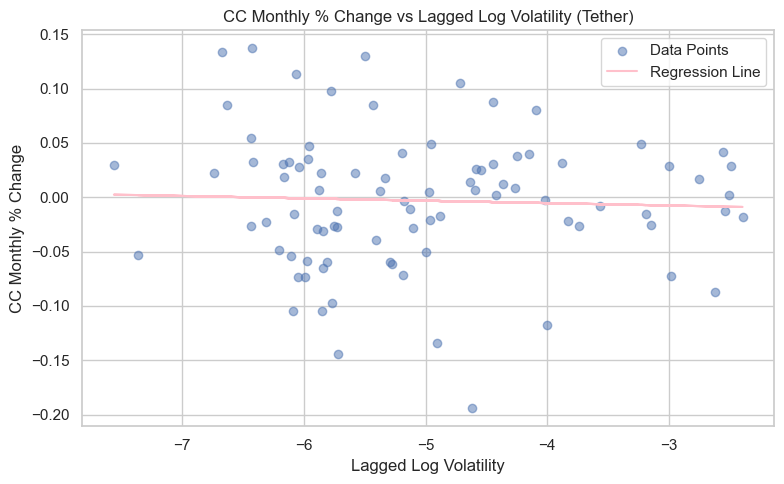

===== Litecoin Regression Summary =====
                             OLS Regression Results                            
Dep. Variable:     CC Monthly % Change   R-squared:                       0.005
Model:                             OLS   Adj. R-squared:                 -0.007
Method:                  Least Squares   F-statistic:                    0.3964
Date:                 Wed, 11 Jun 2025   Prob (F-statistic):              0.531
Time:                         13:45:32   Log-Likelihood:                 120.35
No. Observations:                   88   AIC:                            -236.7
Df Residuals:                       86   BIC:                            -231.7
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

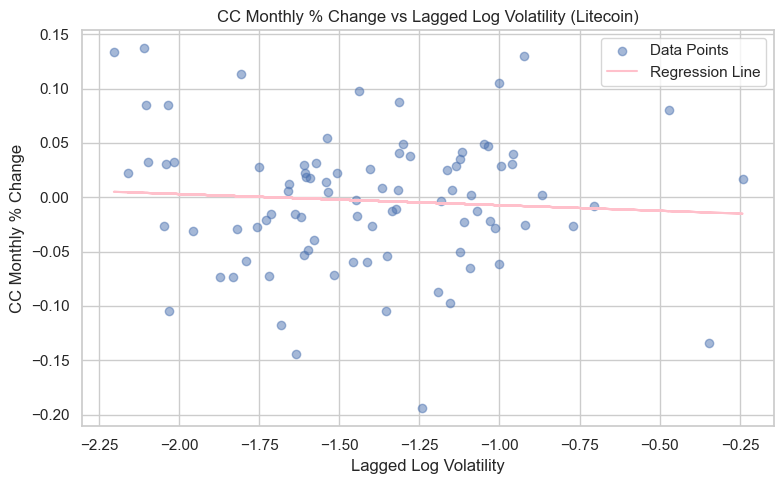

===== XRP Regression Summary =====
                             OLS Regression Results                            
Dep. Variable:     CC Monthly % Change   R-squared:                       0.005
Model:                             OLS   Adj. R-squared:                 -0.006
Method:                  Least Squares   F-statistic:                    0.4678
Date:                 Wed, 11 Jun 2025   Prob (F-statistic):              0.496
Time:                         13:45:32   Log-Likelihood:                 120.38
No. Observations:                   88   AIC:                            -236.8
Df Residuals:                       86   BIC:                            -231.8
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
c

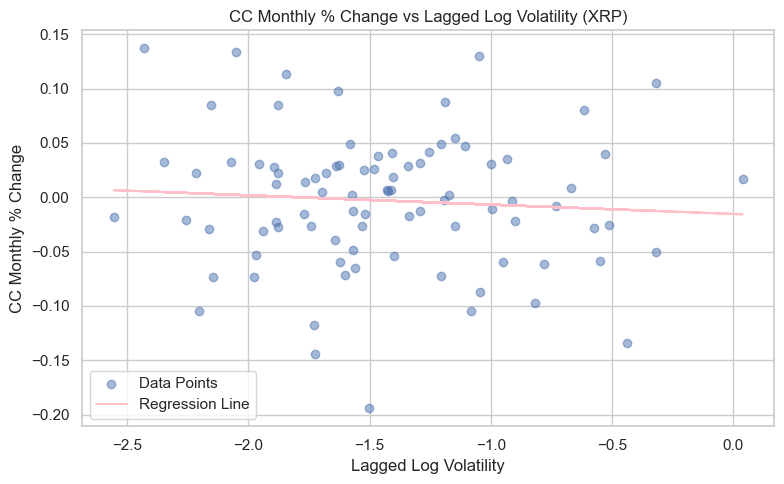

===== Ethereum Regression Summary =====
                             OLS Regression Results                            
Dep. Variable:     CC Monthly % Change   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.012
Method:                  Least Squares   F-statistic:                  0.009665
Date:                 Wed, 11 Jun 2025   Prob (F-statistic):              0.922
Time:                         13:45:32   Log-Likelihood:                 120.15
No. Observations:                   88   AIC:                            -236.3
Df Residuals:                       86   BIC:                            -231.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

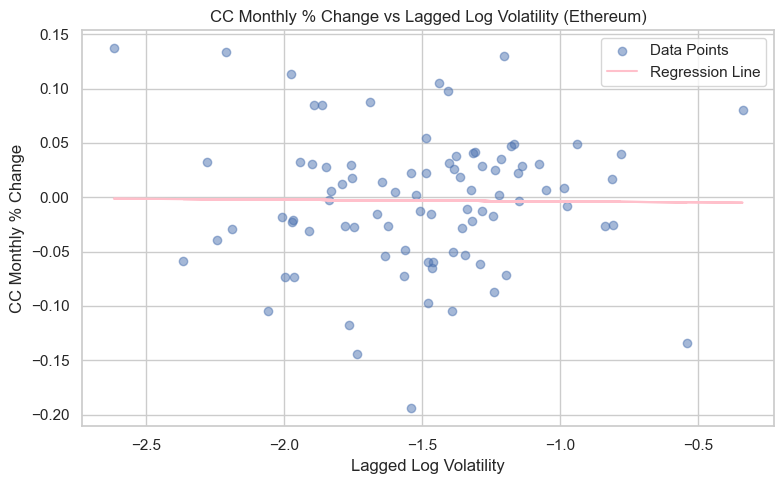

===== Dogecoin Regression Summary =====
                             OLS Regression Results                            
Dep. Variable:     CC Monthly % Change   R-squared:                       0.049
Model:                             OLS   Adj. R-squared:                  0.038
Method:                  Least Squares   F-statistic:                     4.428
Date:                 Wed, 11 Jun 2025   Prob (F-statistic):             0.0383
Time:                         13:45:33   Log-Likelihood:                 122.35
No. Observations:                   88   AIC:                            -240.7
Df Residuals:                       86   BIC:                            -235.8
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

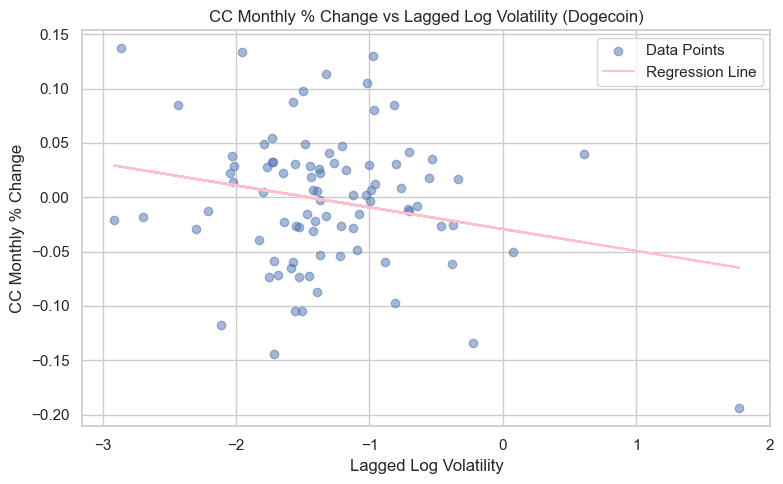

===== Cardano  Regression Summary =====
                             OLS Regression Results                            
Dep. Variable:     CC Monthly % Change   R-squared:                       0.006
Model:                             OLS   Adj. R-squared:                 -0.006
Method:                  Least Squares   F-statistic:                    0.5158
Date:                 Wed, 11 Jun 2025   Prob (F-statistic):              0.475
Time:                         13:45:33   Log-Likelihood:                 111.57
No. Observations:                   83   AIC:                            -219.1
Df Residuals:                       81   BIC:                            -214.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

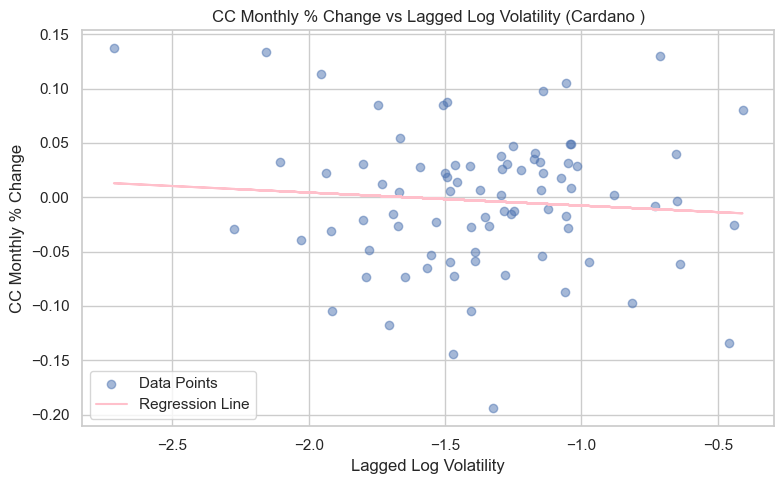

===== USD Coin Regression Summary =====
                             OLS Regression Results                            
Dep. Variable:     CC Monthly % Change   R-squared:                       0.006
Model:                             OLS   Adj. R-squared:                 -0.009
Method:                  Least Squares   F-statistic:                    0.3915
Date:                 Wed, 11 Jun 2025   Prob (F-statistic):              0.534
Time:                         13:45:33   Log-Likelihood:                 92.599
No. Observations:                   72   AIC:                            -181.2
Df Residuals:                       70   BIC:                            -176.6
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

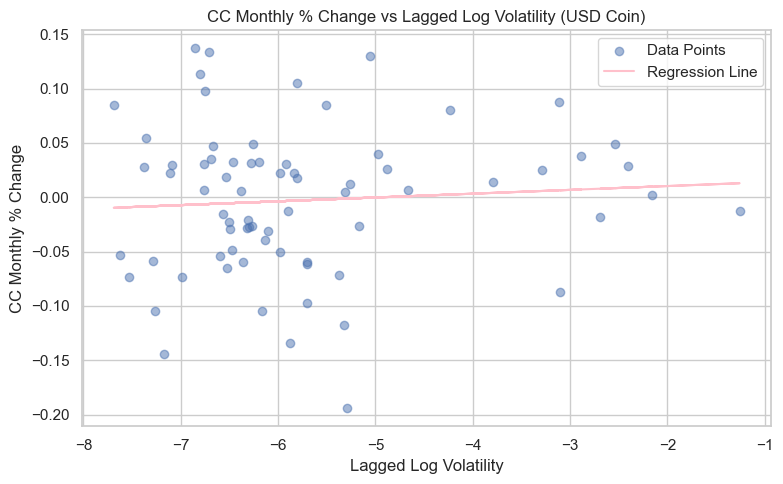

In [111]:
print(df.columns.tolist())

crypto_columns = ['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano ', 'USD Coin']

for coin in crypto_columns:
    # Create lagged log volatility
    df['Lagged_LogVol'] = df[coin].shift(1)

    # Drop first row due to NaN from lag
    temp_df = df.dropna(subset=['Lagged_LogVol', 'CC Monthly % Change'])

    # Define X and y
    X = temp_df['Lagged_LogVol']
    y = temp_df['CC Monthly % Change']

    X = sm.add_constant(X)  # Adds intercept

    # Fit OLS model
    model = sm.OLS(y, X).fit()

    # Print regression summary
    print(f"===== {coin} Regression Summary =====")
    print(model.summary())
    print("\n")

    # Plot: CPI vs Lagged_LogVol with regression line
    plt.figure(figsize=(8, 5))
    plt.scatter(temp_df['Lagged_LogVol'], y, alpha=0.5, label='Data Points')
    plt.plot(temp_df['Lagged_LogVol'], model.predict(X), color='pink', label='Regression Line')
    plt.title(f'CC Monthly % Change vs Lagged Log Volatility ({coin})')
    plt.xlabel('Lagged Log Volatility')
    plt.ylabel('CC Monthly % Change')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## GDP
#### Tether (0.452), Litecoin (0.488), Ethereum (0.299)

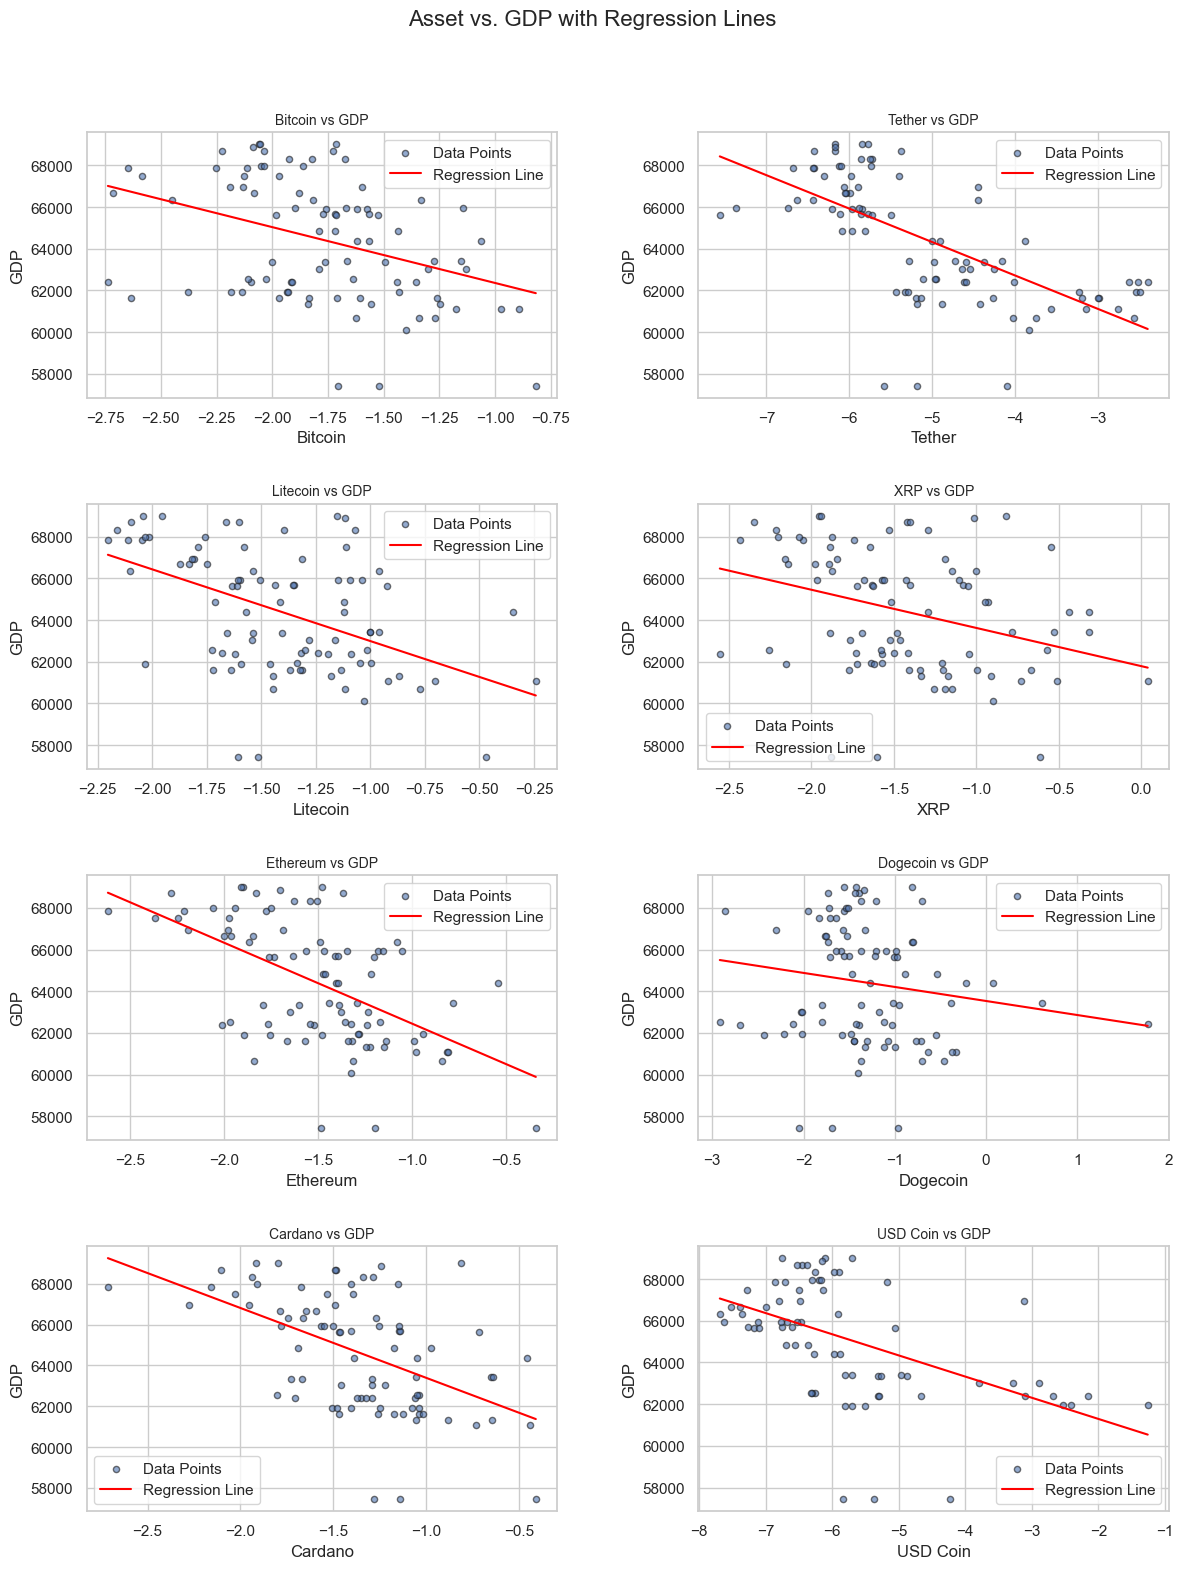

===== Bitcoin Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     14.10
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           0.000314
Time:                        13:45:33   Log-Likelihood:                -819.52
No. Observations:                  88   AIC:                             1643.
Df Residuals:                      86   BIC:                             1648.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const  

In [112]:
import seaborn as sns
import numpy as np

asset_cols = ['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano ', 'USD Coin']
macro_cols = ['GDP']

sns.set(style="whitegrid")

total_plots = len(asset_cols) * len(macro_cols)
plots_per_row = 2
n_rows = (total_plots + plots_per_row - 1) // plots_per_row  # ceiling division

fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(6 * plots_per_row, 4 * n_rows))
fig.suptitle("Asset vs. GDP with Regression Lines", fontsize=16)

axes = axes.flatten() if total_plots > 1 else [axes]
model_results = []

plot_idx = 0
for asset in asset_cols:
    for macro in macro_cols:
        if plot_idx >= total_plots:
            break
        ax = axes[plot_idx]
        
        # Drop rows with NaNs in either variable
        temp_df = df[[asset, macro]].dropna()
        x = temp_df[asset]
        y = temp_df[macro]

        # Scatter plot
        ax.scatter(x, y, alpha=0.6, edgecolor='k', s=20, label='Data Points')
        
        df['Lagged_LogVol'] = df[asset].shift(1)

        # Drop first row due to NaN from lag
        temp_df = df.dropna(subset=['Lagged_LogVol', macro])

        # Define X and y
        X = temp_df['Lagged_LogVol']
        y = temp_df[macro]

        X = sm.add_constant(X)  # Adds intercept

        # Fit OLS model
        model = sm.OLS(y, X).fit()
        model_results.append((asset.strip(), model))

        # Predict y values for a line
        x_vals = np.linspace(x.min(), x.max(), 100)
        X_pred = sm.add_constant(x_vals)
        y_pred = model.predict(X_pred)

        # Plot regression line
        ax.plot(x_vals, y_pred, color='red', label='Regression Line')

        ax.set_xlabel(asset.strip())
        ax.set_ylabel(macro)
        ax.set_title(f"{asset.strip()} vs {macro}", fontsize=10)
        ax.legend()

        plot_idx += 1
        

# Hide unused subplots
for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

for asset_name, model in model_results:
    print(f"===== {asset_name} Regression Summary =====")
    print(model.summary())
    print("\n")


## Fed Funds Rate

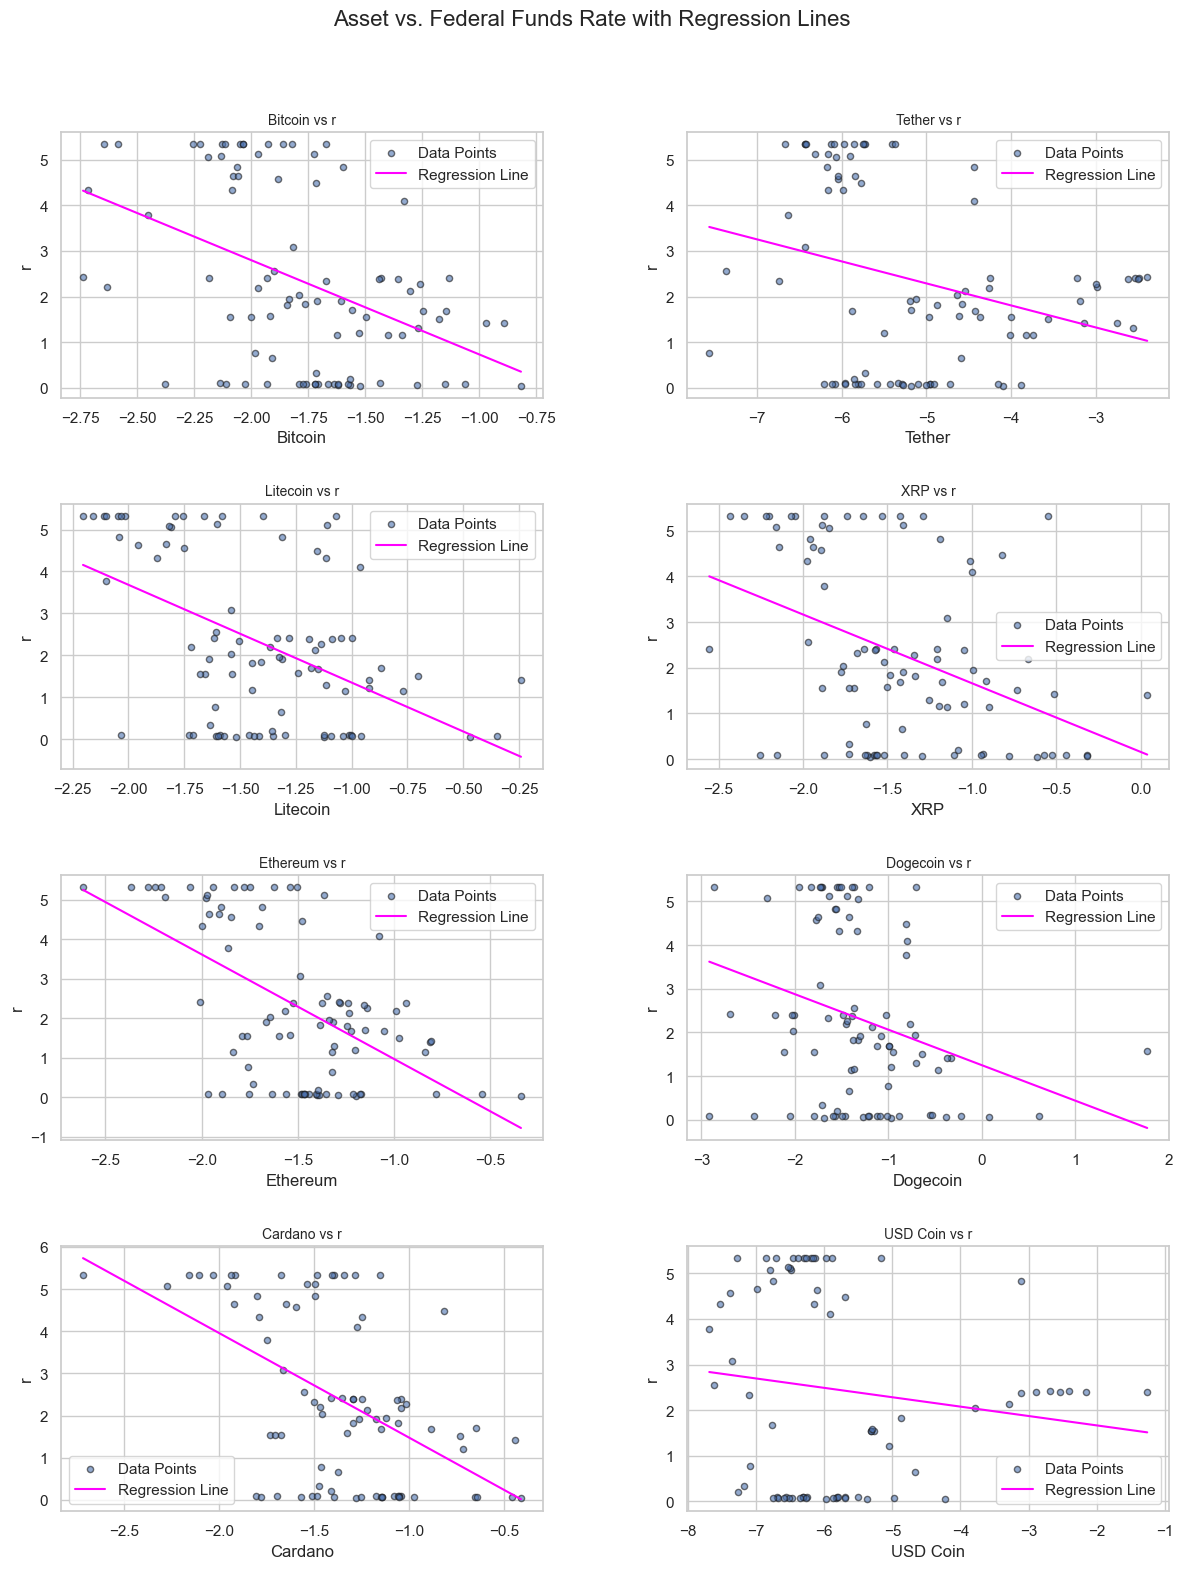

===== Bitcoin Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                      r   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     19.24
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           3.25e-05
Time:                        13:45:34   Log-Likelihood:                -175.03
No. Observations:                  88   AIC:                             354.1
Df Residuals:                      86   BIC:                             359.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const  

In [113]:
import seaborn as sns
import numpy as np

asset_cols = ['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano ', 'USD Coin']
macro_cols = ['r']

sns.set(style="whitegrid")

total_plots = len(asset_cols) * len(macro_cols)
plots_per_row = 2
n_rows = (total_plots + plots_per_row - 1) // plots_per_row  # ceiling division

fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(6 * plots_per_row, 4 * n_rows))
fig.suptitle("Asset vs. Federal Funds Rate with Regression Lines", fontsize=16)

axes = axes.flatten() if total_plots > 1 else [axes]
model_results = []

plot_idx = 0
for asset in asset_cols:
    for macro in macro_cols:
        if plot_idx >= total_plots:
            break
        ax = axes[plot_idx]
        
        # Drop rows with NaNs in either variable
        temp_df = df[[asset, macro]].dropna()
        x = temp_df[asset]
        y = temp_df[macro]

        # Scatter plot
        ax.scatter(x, y, alpha=0.6, edgecolor='k', s=20, label='Data Points')
        

        df['Lagged_LogVol'] = df[asset].shift(1)

        # Drop first row due to NaN from lag
        temp_df = df.dropna(subset=['Lagged_LogVol', macro])

        # Define X and y
        X = temp_df['Lagged_LogVol']
        y = temp_df[macro]

        X = sm.add_constant(X)  # Adds intercept

        # Fit OLS model
        model = sm.OLS(y, X).fit()
        model_results.append((asset.strip(), model))

        # Predict y values for a line
        x_vals = np.linspace(x.min(), x.max(), 100)
        X_pred = sm.add_constant(x_vals)
        y_pred = model.predict(X_pred)

        # Plot regression line
        ax.plot(x_vals, y_pred, color='magenta', label='Regression Line')

        ax.set_xlabel(asset.strip())
        ax.set_ylabel(macro)
        ax.set_title(f"{asset.strip()} vs {macro}", fontsize=10)
        ax.legend()

        plot_idx += 1
        

# Hide unused subplots
for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

for asset_name, model in model_results:
    print(f"===== {asset_name} Regression Summary =====")
    print(model.summary())
    print("\n")


# Adjusted Time Frame (2020-2025)

## All Assets

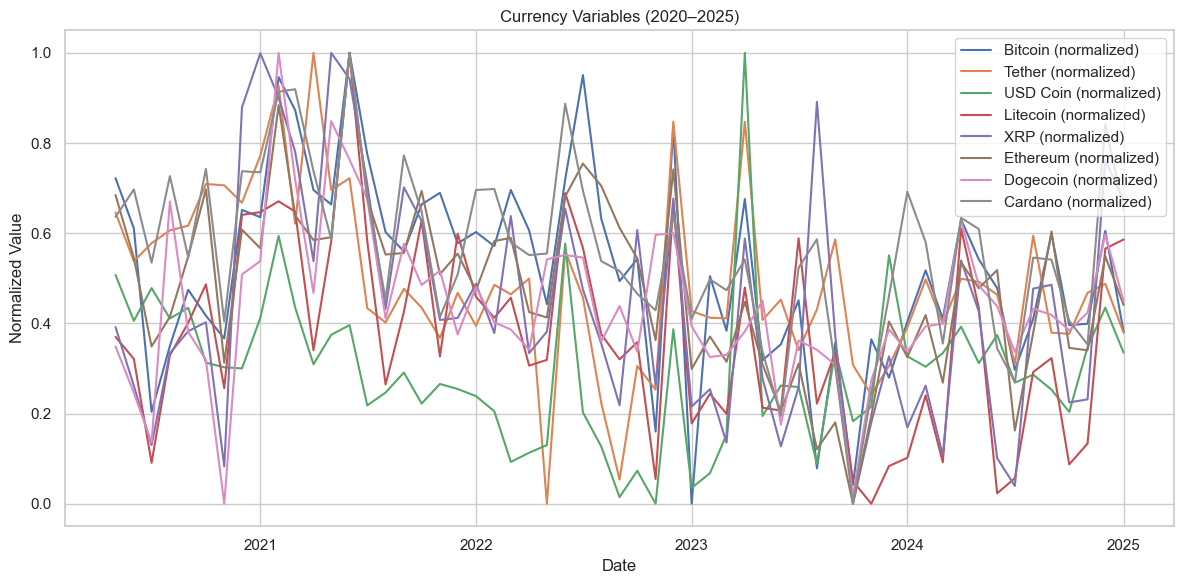

In [114]:
df_new = df[32:]

# Plot all four columns on the same graph
plt.figure(figsize=(12, 6))

# Normalize each series for comparison (optional but recommended)
df_normalized = df_new[['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano ', 'USD Coin']].apply(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# Plot
plt.plot(df_normalized.index, df_normalized['Bitcoin'], label='Bitcoin (normalized)')
plt.plot(df_normalized.index, df_normalized['Tether'], label='Tether (normalized)')
plt.plot(df_normalized.index, df_normalized['USD Coin'], label='USD Coin (normalized)')
plt.plot(df_normalized.index, df_normalized['Litecoin'], label='Litecoin (normalized)')
plt.plot(df_normalized.index, df_normalized['XRP'], label='XRP (normalized)')
plt.plot(df_normalized.index, df_normalized['Ethereum'], label='Ethereum (normalized)')
plt.plot(df_normalized.index, df_normalized['Dogecoin'], label='Dogecoin (normalized)')
plt.plot(df_normalized.index, df_normalized['Cardano '], label='Cardano (normalized)')

plt.title('Currency Variables (2020–2025)')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## All Macros

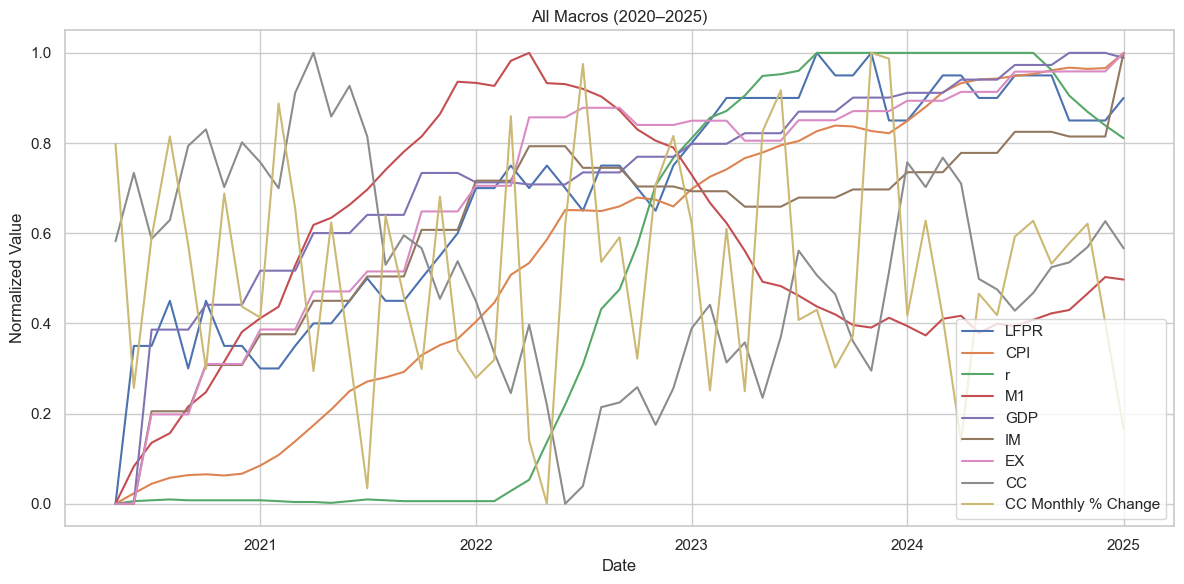

In [115]:
# Plot all four columns on the same graph

plt.figure(figsize=(12, 6))

# Normalize each series for comparison (optional but recommended)
df_normalized = df_new[['LFPR', 'CPI', 'r', 'M1', 'GDP', 'IM', 'EX', 'CC', 'CC Monthly % Change']].apply(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# Plot
plt.plot(df_normalized.index, df_normalized['LFPR'], label='LFPR')
plt.plot(df_normalized.index, df_normalized['CPI'], label='CPI')
plt.plot(df_normalized.index, df_normalized['r'], label='r')
plt.plot(df_normalized.index, df_normalized['M1'], label='M1')
plt.plot(df_normalized.index, df_normalized['GDP'], label='GDP')
plt.plot(df_normalized.index, df_normalized['IM'], label='IM')
plt.plot(df_normalized.index, df_normalized['EX'], label='EX')
plt.plot(df_normalized.index, df_normalized['CC'], label='CC')
plt.plot(df_normalized.index, df_normalized['CC Monthly % Change'], label='CC Monthly % Change')

plt.title('All Macros (2020–2025)')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()